# Improving color wine classification using PCA
### We want, based on the characteristics of a wine, to be able to predict its color (1 = red, 0 = white).

* We will use (adapted) a dataset concerning [wines from Portugal](https://archive.ics.uci.edu/ml/datasets/wine+quality).

In [1]:
import pandas as pd
wines = pd.read_csv("wines_color.csv")
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,0
1,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
2,6.3,0.23,0.22,3.75,0.039,37.0,116.0,0.99270,3.23,0.50,10.7,0
3,5.9,0.32,0.20,14.40,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,0
4,5.7,0.16,0.32,1.20,0.036,7.0,89.0,0.99111,3.26,0.48,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.9,0.26,0.41,15.15,0.040,38.0,216.0,0.99760,2.96,0.60,10.0,0
6493,6.5,0.18,0.33,1.40,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,0
6494,6.3,0.76,0.00,2.90,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1
6495,10.2,0.41,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,1


* We will put the features and the target in two separate tables.

In [2]:
X = wines.loc[:,'fixed acidity':'alcohol'].values
y = wines['color'].values

* We will use yet another method for classification, which is based on Bayes Theorem.

* As we have said, the good thing about scikit-learn is that very easily we can move from one method to another.

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

clf = GaussianNB()
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean(), scores.std())

[0.97153846 0.97       0.97459584 0.96766744 0.96458814]
0.9696779771421806 0.003397033199922367


* Now, let's see what happens if we use PCA as a first step before classification.

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

clf = make_pipeline(PCA(n_components=2), GaussianNB())
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean(), scores.std())

[0.90230769 0.91       0.91454965 0.91839877 0.89992302]
0.9090358263753183 0.007032889481103321


* We have of course said that before PCA it is good to adjust our data to have a mean of 0 and a variance of 1.

* The pipeline mechanism helps us to ensure that everything is done in order, correctly, without information leakage from training to control.

* As we can see, after viewing in two dimensions we now get better results even than sorting in full dimensions!

In [5]:
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print(scores.mean(), scores.std())

[0.98846154 0.98692308 0.98383372 0.97767513 0.97459584]
0.9822978622609109 0.005337285450086674


* Let's stop here for a while and see what we have achieved.

* It is easier to classify the wines than it appears in the two dimensions.

* Also, in two dimensions it is easier to see what is going on, than in the original 11 dimensions.

* Let's confirm this, starting from the beginning.

* We use `StandardScaler` in our data.

* We apply this to all data since we are not currently interested in the separation into training and control.

In [6]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
X_scaled

array([[-1.32319841, -0.11946024, -1.29817304, ...,  0.25811972,
        -1.016626  ,  0.17457294],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       [-0.70607349, -0.66616126, -0.6787934 , ...,  0.07152334,
        -0.21014415,  0.17457294],
       ...,
       [-0.70607349,  2.55330026, -2.19283252, ...,  1.81308951,
         0.46192405,  0.845365  ],
       [ 2.30241047,  0.42724077,  0.76642577, ..., -0.3638682 ,
         0.9323718 ,  0.25842195],
       [-0.16608919, -0.66616126,  0.69760581, ...,  0.00932455,
        -0.74779872, -1.41855821]])

* We reduce the dimensions to two.

In [7]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_scaled)
X_transformed

array([[ 0.98542565, -1.90759155],
       [-3.07189347,  0.87896444],
       [ 0.55368215, -1.20582766],
       ...,
       [-2.72326402, -1.25252651],
       [-2.69250728,  1.64364075],
       [ 2.0094849 ,  2.40380926]])

* And we depict the two dimensions and the color of each wine.

* We can see why the classification worked well: the wines can fit, in the two dimensions, into two distinct clusters.

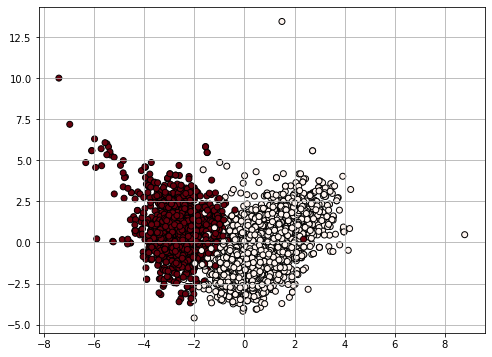

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x=X_transformed[:,0], y=X_transformed[:,1], c=wines['color'], edgecolor='k', cmap='Reds')
plt.grid()